# Obtain all necessary imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython import get_ipython;   
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from IPython.display import display, HTML

# Obtain cell $V_{PLC}$ parameters from NumPy arrays

In [2]:
spikes=np.load("./stochastic/parameters_record_500.npy", encoding="latin1", allow_pickle=True)
transient=np.load("./stochastic/parameters_record_501.npy", encoding="latin1", allow_pickle=True)
wave=np.load("./stochastic/parameters_record_502.npy", encoding="latin1", allow_pickle=True)
flutter=np.load("./stochastic/parameters_record_504.npy", encoding="latin1", allow_pickle=True)

# Create dataframe for plotting

In [3]:
df = pd.DataFrame(columns=['vplc', 'category'])
j=0

for v in spikes.item()['VPLC_state']:
    df.loc[j]=[v[0],'Spikes']
    j+=1

for v in transient.item()['VPLC_state']:
    df.loc[j]=[v[0],'ICT']
    j+=1

for v in wave.item()['VPLC_state']:
    df.loc[j]=[v[0],'ICW']
    j+=1
    
for v in flutter.item()['VPLC_state']:
    df.loc[j]=[v[0],'Fluttering']
    j+=1

# $V_{PLC}$ distributions for each calcium pattern (excluding fluttering) 

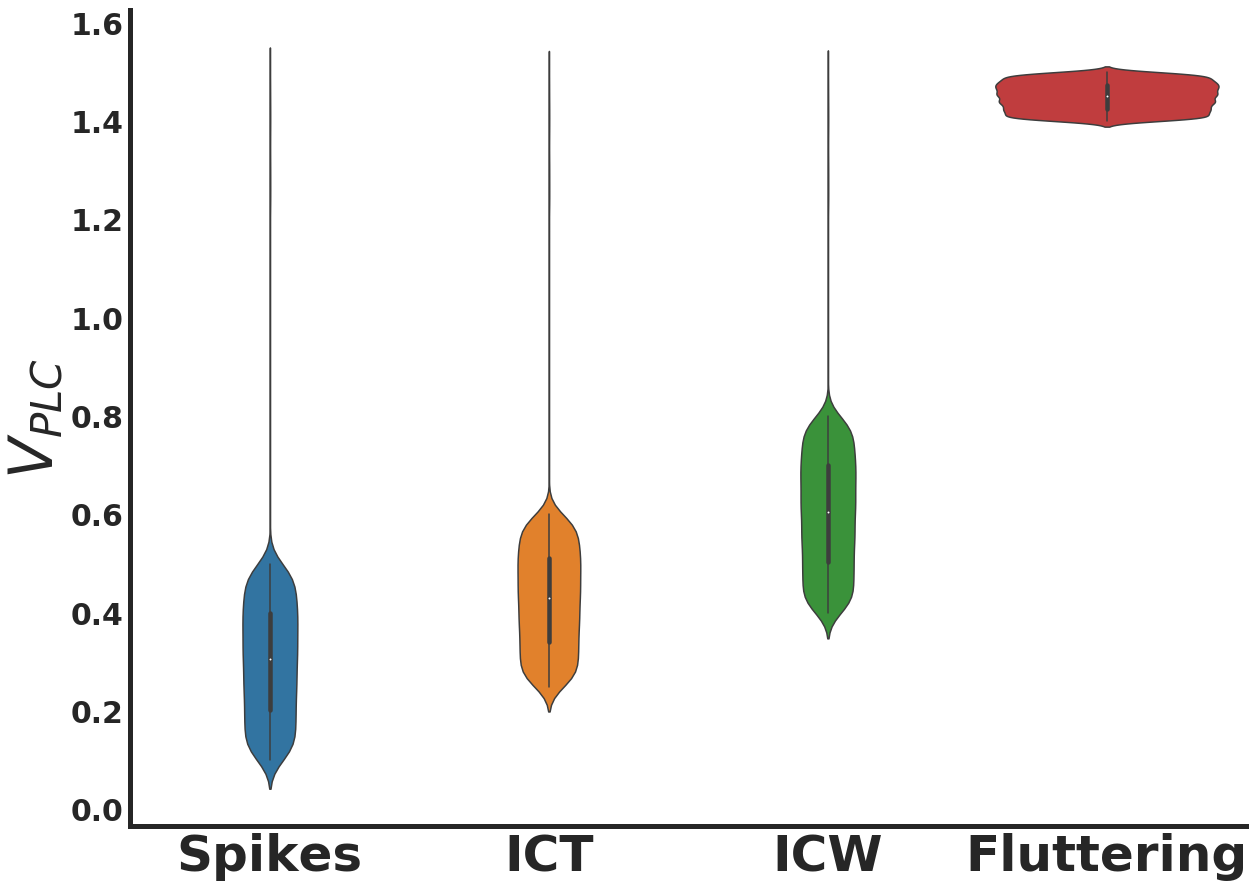

In [4]:
with sns.axes_style("white"):
    fig=plt.figure(figsize=(20,15))
    ax = plt.axes()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)
    ax.tick_params(axis='both', which='minor', labelsize=5)
    legend_properties = {'weight':'bold','size':20}
    plt.yticks(fontsize=30, fontweight="bold")
    
    plt.xticks(np.arange(3), ('Tom', 'Dick', 'Harry'),fontsize=50, fontweight="bold")
    plt.ylabel(r'$V_{PLC}$' ,fontsize=50,fontweight='bold')
    plt.xlabel('off')
    sns.violinplot("category", "vplc", data=df)
    ax.set_ylabel(r'$V_{PLC}$',fontsize=60, fontweight="bold")
    ax.set_xlabel('')


saveFolderName = './simulationResults/Figure_2' # The folder where simulation results are to be saved for this notebook
if not os.path.exists(saveFolderName): # Create the folder if it does not yet exist
    os.makedirs(saveFolderName)
    
#fig.savefig(saveFolderName+'/Panel_E',transparent=True)   

# $V_{PLC}$ distributions for each calcium pattern

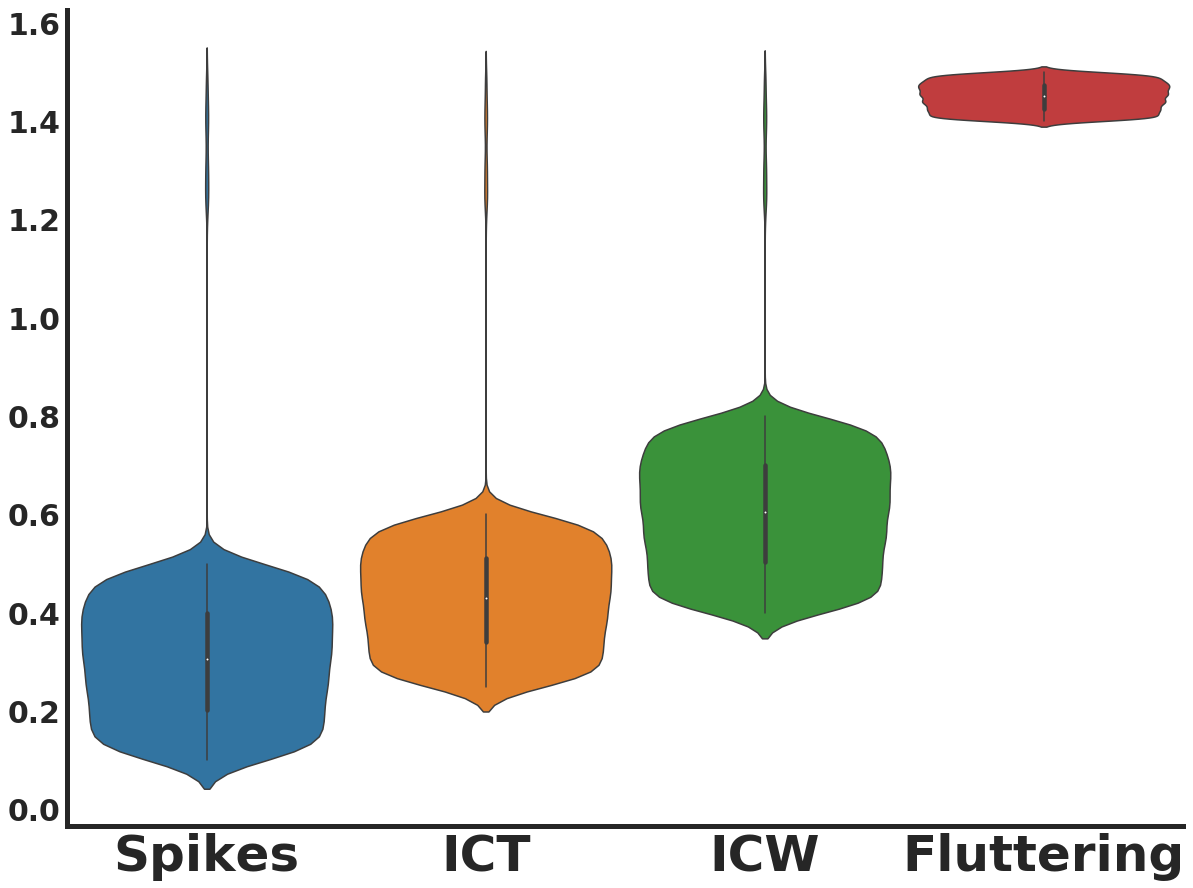

In [5]:
with sns.axes_style("white"):
    fig=plt.figure(figsize=(20,15))
    ax = plt.axes()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)
    ax.tick_params(axis='both', which='minor', labelsize=5)
    legend_properties = {'weight':'bold','size':20}
    plt.yticks(fontsize=30, fontweight="bold")
    
    plt.xticks(np.arange(3), ('Tom', 'Dick', 'Harry'),fontsize=50, fontweight="bold")
    plt.ylabel(r'$V_{PLC}$' ,fontsize=50,fontweight='bold')
    plt.xlabel('off')
    plt.ylabel('off')
    sns.violinplot("category", "vplc", data=df, width=0.9, scale='count')
    ax.set_ylabel(r'$V_{PLC}$',fontsize=60, fontweight="bold")
    ax.set_xlabel('')
    ax.set_ylabel('')

    fig.savefig(saveFolderName+'/Panel_E.pdf',transparent=True)   